In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets


In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

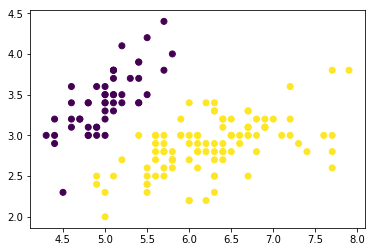

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def lossfunction(theta, X, y, C = 1):
    m = X.shape[0]
    h = sigmoid(np.dot(X, theta))
    theta1 = theta.copy()
    theta1[0] = 0

    return  (1 / m) * (np.dot(-y.T, np.log(h)) - np.dot((1 - y).T, np.log(1 - h))) + (1 /(2 * m * C)) * np.dot(theta.T, theta.T)

def gradient(theta, X, y, C = 1):
    m = X.shape[0]
    h = sigmoid(np.dot(X, theta))
    theta1 = theta.copy()
    theta1[0] = 0
    return (1 / m) * (np.dot(X.T, (h - y)) + (1 / C) * theta1)

def linearregression(X, y, C = 1, lr = 0.01, iteration = 100000, verbose = False):

    intercept = np.ones((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis = 1)
    theta = np.zeros(X.shape[1])
    for i in range(iteration):
        gradients = gradient(theta, X, y, C)
        theta -= lr * gradients
        if(verbose == True and i % 10000 == 0):
            print('loss: {}'.format(lossfunction(theta, X, y, C)))
    return theta

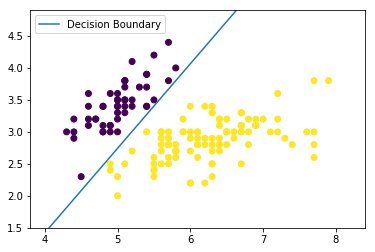

In [15]:
theta = linearregression(X, y, C = 0.15,  lr = 0.01, iteration=300000)

plt.scatter(X[:, 0], X[:, 1], c=y)
x_values = [np.min(X[:, 0] - 5), np.max(X[:, 1] + 5)]
y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]
plt.xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
plt.ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
plt.plot(x_values, y_values, label='Decision Boundary')
plt.legend()